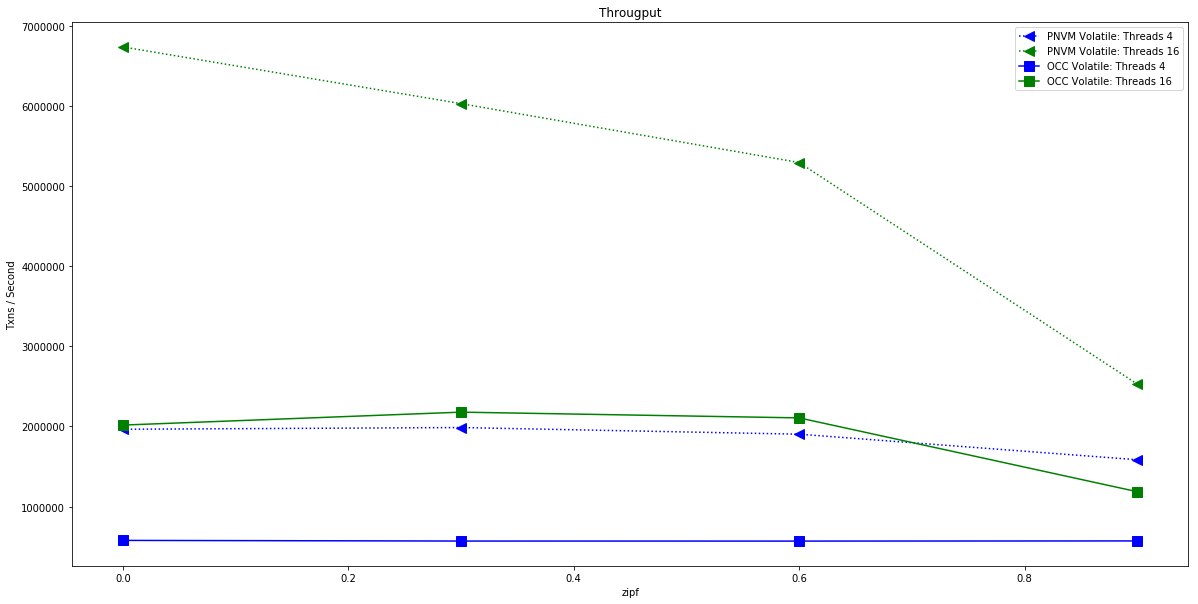

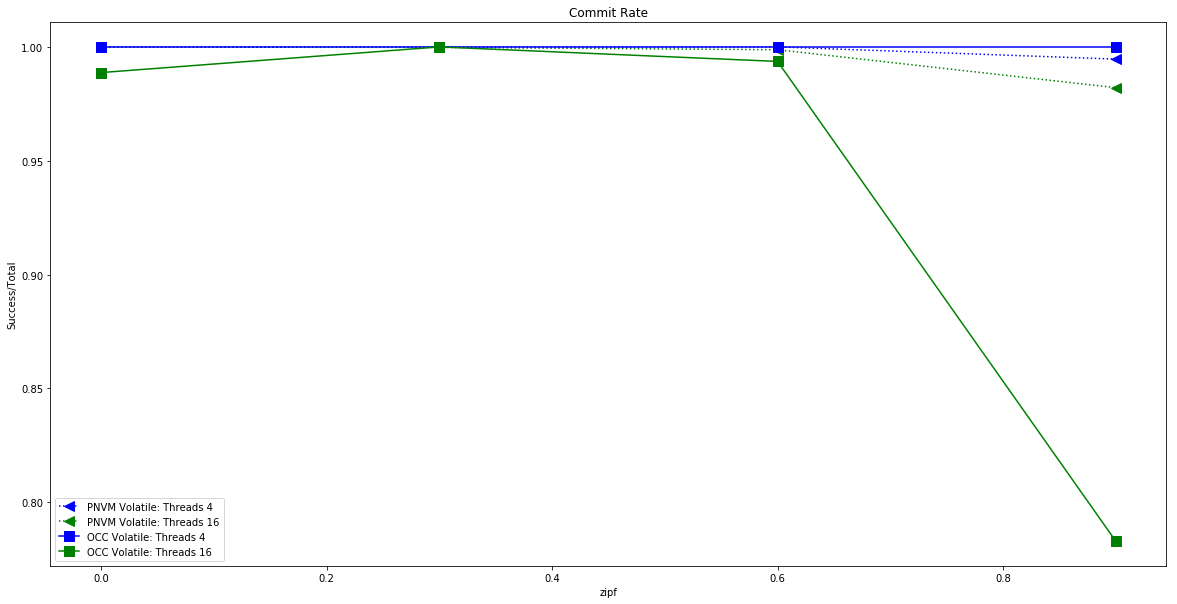

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

nvm_res_file = '../benchmark/nvm-output.csv'
occ_res_file = '../benchmark/occ-output.csv'

nvm_pc_num_file = '../benchmark/nvm-pc-num-output.csv'
occ_pc_num_file = '../benchmark/occ-pc-num-output.csv'

nvm_set_size_file = '../benchmark/nvm-set-size.csv'
occ_set_size_file = '../benchmark/occ-set-size.csv'

occ_pmem_file='../benchmark/occ-pmem.csv'
nvm_pmem_file='../benchmark/nvm-pmem.csv'


thd_colors = {4: 'b', 8: 'g', 16:'r', 32:'c'}
thd_markers = {4: '<', 8: 's', 16:'o', 32:'v'}

pc_colors = {5: 'b', 10: 'g', 15: 'r', 20: 'c'}
pc_markers = {5: '<', 10: 's', 15: 'o', 20: 'v'}

ss_colors = {10: 'b', 20: 'g', 30: 'r', 50: 'c'}
ss_markers = {10: '<', 20: 's', 30: 'o', 50: 'v'}

zipf_markers = {0.2: '<', 0.4: 's', 0.6: 'o', 0.8: 'v'}
zipf_colors = {0.2: 'b', 0.4: 'g', 0.6: 'r', 0.8: 'c'}

lines = [':', '-', ':', '-']
colors = ['b','g','r','y','p']
markers = ['<', 's', 'o', 'v']

def process_data(file, groupby, filter_col=None, values=None, scale=1):
    df = pd.read_csv(file)

    df['tp'] = df.success/(df.total_time/1000) / scale
    df['rate'] = df.success/ (df.success+df.abort)
    if filter_col != None:
        df = df.loc[~df[filter_col].isin(values)]
            

    df_avg = df.groupby(groupby, as_index=False).mean()

    
    return df_avg
   
def draw(series,x_axis, y_axis, title, xlabel, ylabel, groupby, markers,colors, legend, name):
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for idx, serie in enumerate(series):
        idx_key = 0
        for key, grp in serie.groupby(groupby):
            marker = markers[idx]
            color=colors[idx_key]
            plt.plot(grp[x_axis], grp[y_axis] ,
                     label= '{}: {} {}'.format(legend[idx], name, key), 
                     marker=marker, 
                     linestyle=lines[idx], 
                     markersize=10,
                     color=color
                    ) 
            idx_key+=1

    
    
    plt.legend()
    plt.show()
    

occ = process_data(occ_res_file, ['thread_num', 'zipf'], 'thread_num', [8, 1, 32])
nvm = process_data(nvm_res_file, ['thread_num', 'zipf'], 'thread_num', [8, 1, 32])

occ_pmem = process_data(occ_pmem_file, ['thread_num', 'zipf'], 'thread_num', [8, 4, 32])
nvm_pmem = process_data(nvm_pmem_file, ['thread_num', 'zipf'], 'thread_num', [8, 4, 32])


# for tp and commit rate - VOLATILE
#draw([nvm, occ], 'zipf', 'tp', 'Througput', 'zipf', 'Txns / Second', ['thread_num'], markers, colors, ['PNVM Volatile',  'OCC Volatile'],'Threads' )
#draw([nvm, occ], 'zipf', 'rate', 'Commit Rate','zipf', 'Success/Total', ['thread_num'], markers, colors, ['PNVM Volatile',  'OCC Volatile'],'Threads' )

#draw([nvm, nvm_pmem, occ, occ_pmem], 'tp', 'Througput', 'Txns / Second', ['thread_num'], markers, colors, ['PNVM Volatile', 'PNVM Persist', 'OCC Volatile', 'OCC Persist'],'Threads' )


#draw(occ, occ_pmem, 'tp', 'Througput', 'Txns / Second', ['thread_num'], thd_markers, thd_colors, ['PNVM Volatile', 'PNVM Persist'],'Threads' )
#draw(occ, occ_pmem, 'rate', 'Commit Rate', 'success/total', ['thread_num'], thd_markers, thd_colors, ['PNVM Volatile', 'PNVM Persist'], 'Threads')

#occ_pc = process_data(occ_pc_num_file, ['pc_num','zipf'], 'pc_num', [10, 15])
#nvm_pc = process_data(nvm_pc_num_file, ['pc_num','zipf'], 'pc_num', [10, 15])

#draw(occ_pc, nvm_pc, 'tp', 'Throughput, 16 Threads, 30 ops/piece', 'Txns / Second', ['pc_num'], pc_markers, pc_colors,'Piece/Txn')

occ_ss = process_data(occ_set_size_file, ['set_size', 'zipf'], 'set_size', [20, 30])
nvm_ss = process_data(nvm_set_size_file, ['set_size', 'zipf'], 'set_size', [20, 30])
# 10 pieces 
#draw(occ_ss, nvm_ss, 'tp', 'Throughput, 10 Pieces, 16 Threads', 'Txns/Second', ['set_size'], ss_markers, ss_colors,'Number of Ops/Piece')



# Scaling Results with Threads 

nvm_thd_file = '../benchmark/nvm-thd.csv'
occ_thd_file = '../benchmark/occ-thd.csv'
occ_par_thd_file = '../benchmark/occ-par-thd.csv'

nvm_thd = process_data(nvm_thd_file, ['zipf', 'thread_num'], 'thread_num', [32])
occ_thd = process_data(occ_thd_file, ['zipf', 'thread_num'], 'thread_num', [32])
occ_par_thd = process_data(occ_par_thd_file, ['zipf', 'thread_num'], 'thread_num', [32])

#draw([nvm_thd],'thread_num','tp', 'Throughput', 'Thread NUm', 'Txns / Second', ['zipf'], markers, colors, ['PNVM Volatile'], 'Zipf')
#draw([occ_thd],'thread_num','tp', 'Throughput', 'Thread NUm', 'Txns / Second', ['zipf'], markers, colors, ['OCC Volatile'], 'Zipf')
#draw([occ_thd],'thread_num','rate', 'Throughput', 'Thread NUm', 'Txns / Second', ['zipf'], markers, colors, ['OCC Volatile'], 'Zipf')


#draw([occ_par_thd],'thread_num','tp', 'Throughput', 'Thread NUm', 'Txns / Second', ['zipf'], markers, colors, ['OCC-Par Volatile'], 'Zipf')
#draw([occ_par_thd],'thread_num','rate', 'Throughput', 'Thread NUm', 'Txns / Second', ['zipf'], markers, colors, ['OCC-Par Volatile'], 'Zipf')


occ = process_data(occ_thd_file, ['zipf', 'thread_num'], 'thread_num', [1,8,32])
occ_par = process_data(occ_par_thd_file, ['zipf', 'thread_num'], 'thread_num', [1,8,32])

draw([occ_par, occ], 'zipf', 'tp', 'Througput', 'zipf', 'Txns / Second', ['thread_num'], markers, colors, ['PNVM Volatile',  'OCC Volatile'],'Threads' )
draw([occ_par, occ], 'zipf', 'rate', 'Commit Rate','zipf', 'Success/Total', ['thread_num'], markers, colors, ['PNVM Volatile',  'OCC Volatile'],'Threads' )


In [5]:
import re
from scipy import stats


def process(file, field):
    lines = [line for line in open(file) if field in line]
    str_values = list(map(lambda l : re.findall("\d+\.\d+", l), lines))
    values = list(map(lambda x : float(x[0]), str_values))
    print('-----------{} -----------\n [{}]'.format(file, field))
    print(stats.describe(values))

    
files =['../profile/nvm.profile.4', '../profile/nvm.profile.8', '../profile/nvm.profile.16']
fields = ['data']

for file in files: 
    for field in fields:
        process(file, field)


-----------../profile/nvm.profile.4 -----------
 [data]
DescribeResult(nobs=20000, minmax=(0.002399, 1.710194), mean=0.0039262168, variance=0.0005053148661898073, skewness=46.38896242582354, kurtosis=2706.5005397855957)
-----------../profile/nvm.profile.8 -----------
 [data]
DescribeResult(nobs=40000, minmax=(0.002399, 2.015193), mean=0.004294340475, variance=0.0007313358646017168, skewness=43.031215236348565, kurtosis=2253.9383050568645)
-----------../profile/nvm.profile.16 -----------
 [data]
DescribeResult(nobs=80000, minmax=(0.002399, 6.532576), mean=0.0054247464375, variance=0.0038002264613801106, skewness=73.9276501050859, kurtosis=6615.946695498292)


In [35]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

thd_colors = {4: 'b', 8: 'g', 16:'r', 32:'c'}
markers = ['<', 's', 'o', 'v']
lines = [':', '-', ':', '-']
colors = ['b','g','r','y','p']
thd_markers = {4: '<', 8: 's', 16:'o', 32:'v'}








def process_data(file, groupby, filter_col=None, values=None, scale=1, piece=False):
    df = pd.read_csv(file)

    # 10 seconds
    df['tp'] = df.success/10 / scale
    if piece:
        df['rate'] = df.pc_success/ (df.pc_success + df.pc_abort)
    else:
        df['rate'] = df.success/ (df.success+df.abort)
        
    df['tp-core'] = df.tp / df.thread_num
    if filter_col != None:
        df = df.loc[~df[filter_col].isin(values)]
            

    df_avg = df.groupby(groupby, as_index=False).mean()
    
    return df_avg


def draw_one_serie(serie,x_axis, y_axis_set, title, xlabel, ylabel, groupby, markers,colors, legend, name):
    plt.figure(figsize=(13,7))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for idx, y_axis in enumerate(y_axis_set):
        idx_key = 0
        marker = markers[idx]
        color=colors[idx]
        plt.plot(serie[x_axis], serie[y_axis] ,
                     marker=marker, 
                     linestyle=lines[idx], 
                     markersize=10,
                     color=color
                    ) 
        idx_key+=1
        # data points label
        for xy in zip(serie[x_axis], serie[y_axis]):   
            plt.annotate('---( %.2f K)' % (xy[1]/1000), xy=xy, textcoords='data') 
    
                                
    
    
    plt.legend()
    plt.show()
    




def draw_mul_serie(series,x_axis, y_axis, title, xlabel, ylabel, groupby, markers,colors, legend, name):
    plt.figure(figsize=(11,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(map(lambda x: int(x), series[0][x_axis])))
    
    for idx, serie in enumerate(series):
        idx_key = 0
        marker = markers[idx]
        color=colors[idx]
        plt.plot(serie[x_axis], serie[y_axis] ,
                     label= '{}: {}'.format(legend[idx], name), 
                     marker=marker, 
                     linestyle=lines[idx], 
                     markersize=10,
                     color=color,
                    ) 
        idx_key+=1
        
        for xy in zip(serie[x_axis], serie[y_axis]):   
            plt.annotate('---( %.2f K)' % (xy[1]/1000), xy=xy, textcoords='data') 

    
    
    plt.legend()
    plt.show()
    
    





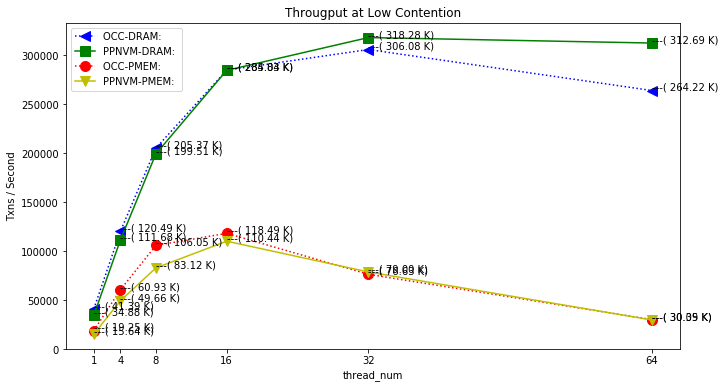

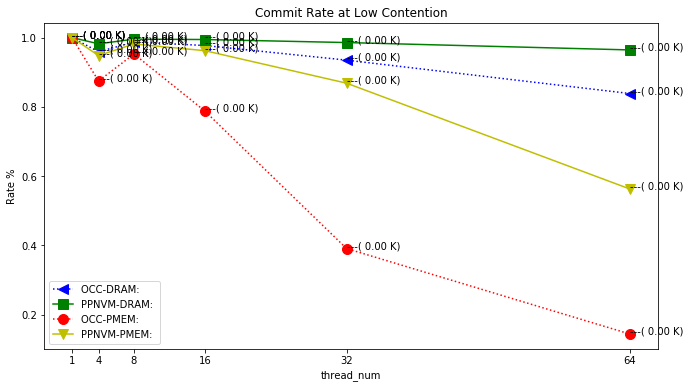

   thread_num  wh_num    success    abort  pc_success  pc_abort  total_time  \
0           1     1.0   156415.0   8424.2    676488.4       0.0     10000.0   
1           4     4.0   496632.8  27223.4   2149134.2  118088.8     10000.0   
2           8     8.0   831215.6  45642.6   3598184.8   67830.8     10000.0   
3          16    16.0  1104444.4  60753.6   4780272.0  187624.0     10000.8   
4          32    32.0   789964.8  43516.8   3419741.6  518070.8     10000.8   
5          64    64.0   300502.2  16554.2   1300714.6  998307.2     10014.0   

          tp      rate       tp-core  
0   15641.50  1.000000  15641.500000  
1   49663.28  0.947951  12415.820000  
2   83121.56  0.981517  10390.195000  
3  110444.44  0.962151   6902.777500  
4   78996.48  0.868285   2468.640000  
5   30050.22  0.562558    469.534688  


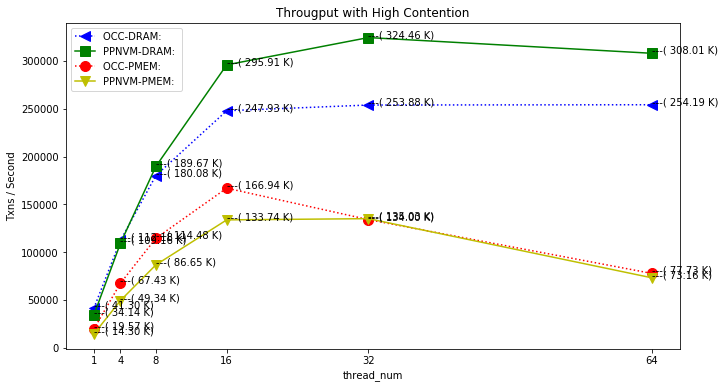

In [39]:
#########################
##### Intel Machine #####
#########################

markers = ['<', 's', 'o', 'v']
lines = [':', '-', ':', '-']
colors = ['b','g','r','y','p']

# Low contention
occ_vol = '../benchmark/intel/low-vol-occ-output.csv'
ppnvm_vol = '../benchmark/intel/low-vol-ppnvm-output.csv'
occ_pmem = '../benchmark/intel/low-pmem-occ-output.csv'
ppnvm_pmem = '../benchmark/intel/low-pmem-ppnvm-output.csv'

occ_vol = process_data(occ_vol, ['thread_num'])
ppnvm_vol = process_data(ppnvm_vol,  ['thread_num'], piece=True)
occ_pmem = process_data(occ_pmem, ['thread_num'])
ppnvm_pmem = process_data(ppnvm_pmem, ['thread_num'], piece=True)

draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'tp', 'Througput at Low Contention', 'thread_num', 'Txns / Second', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'' )


draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'rate', 'Commit Rate at Low Contention', 'thread_num', 'Rate %', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'' )


print(ppnvm_pmem)


# Low contention
occ_vol = '../benchmark/intel/high-vol-occ-output.csv'
ppnvm_vol = '../benchmark/intel/high-vol-ppnvm-output.csv'
occ_pmem = '../benchmark/intel/high-pmem-occ-output.csv'
ppnvm_pmem = '../benchmark/intel/high-pmem-ppnvm-output.csv'

occ_vol = process_data(occ_vol, ['thread_num'])
ppnvm_vol = process_data(ppnvm_vol,  ['thread_num'], piece=True)
occ_pmem = process_data(occ_pmem, ['thread_num'])
ppnvm_pmem = process_data(ppnvm_pmem, ['thread_num'], piece=True)

draw_mul_serie([occ_vol, ppnvm_vol, occ_pmem, ppnvm_pmem], 
               'thread_num', 'tp', 'Througput with High Contention', 'thread_num', 'Txns / Second', 
               ['thread_num'], markers, colors, ['OCC-DRAM',  'PPNVM-DRAM', 'OCC-PMEM', 'PPNVM-PMEM'],'' )





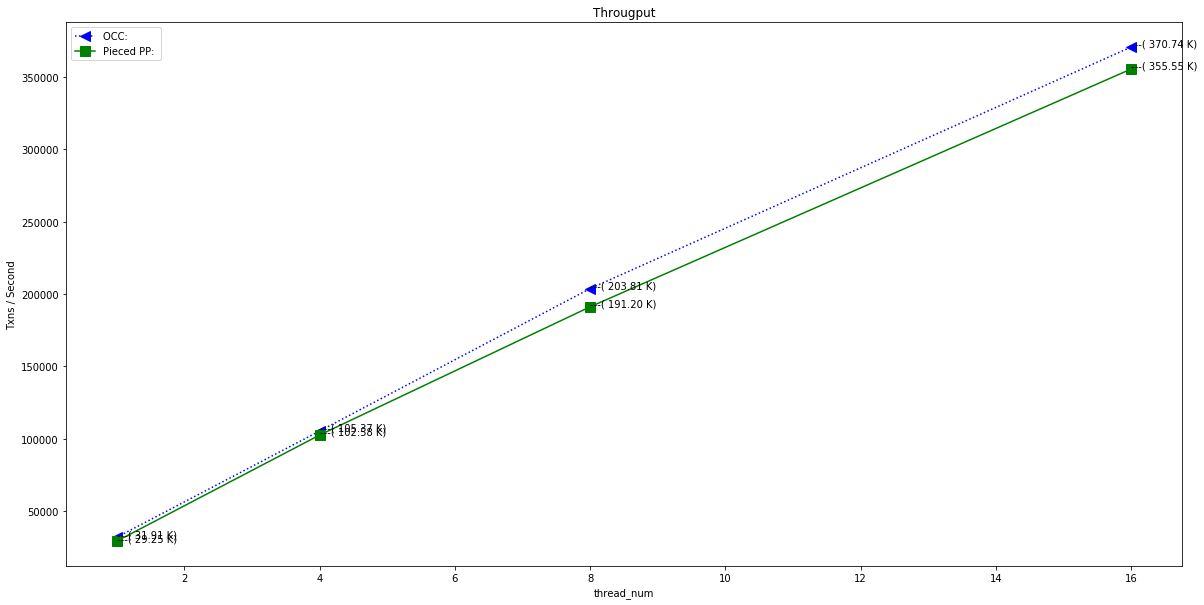

   thread_num  wh_num    success     abort  total_time         tp      rate  \
0           1     1.0   321817.8       0.0     10000.0   32181.78  1.000000   
1           4     1.0   806315.4  270358.4     10000.0   80631.54  0.748896   
2           8     2.0  1409237.8  536063.0     10000.0  140923.78  0.724431   
3          16     4.0  2458491.8  995245.4     10009.2  245849.18  0.711834   

       tp-core  
0  32181.78000  
1  20157.88500  
2  17615.47250  
3  15365.57375  
   thread_num  wh_num    success     abort  pc_success  pc_abort  total_time  \
0           1     1.0   292048.8   16211.6   1264947.8       0.0     10000.0   
1           4     1.0   964167.2   54381.0   4177818.2   59353.2     10006.4   
2           8     2.0  1713701.6   94385.4   7419379.4  251484.6     10000.0   
3          16     4.0  3110077.4  170369.0  13461229.2  488868.0     10000.0   

          tp      rate      tp-core  
0   29204.88  0.947412  29204.88000  
1   96416.72  0.946610  24104.18000  
2  1

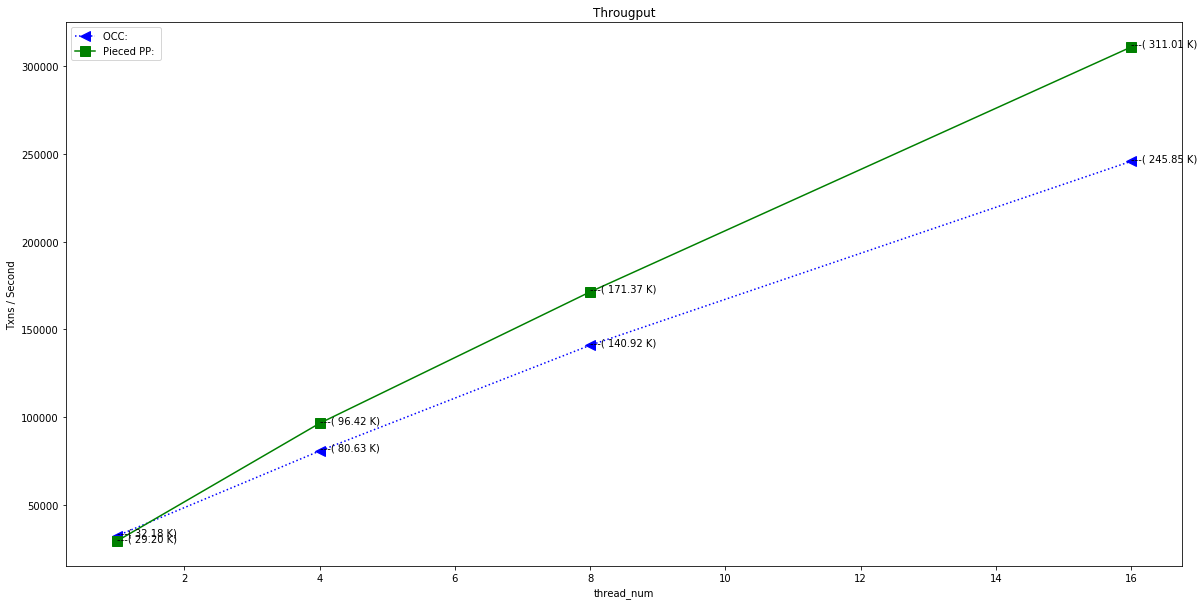

In [2]:
#tpcc_occ_file = '../benchmark/tpcc-1.csv'
# data = process_data(tpcc_occ_file, ['thread_num'])
occ_tpcc_low = '../benchmark/tpcc-occ-1.csv'
pnvm_tpcc_low = '../benchmark/tpcc-pnvm-1.csv'
occ_tpcc_low = process_data(occ_tpcc_low, ['thread_num'])
pnvm_tpcc_low = process_data(pnvm_tpcc_low,  ['thread_num'])


#draw_one_serie(data, 'thread_num', ['tp', 'new-order-tp'], 'Througput', 'Threads', 'Txns / Second', ['thread_num'], markers, colors, ['OCC VOlatile'],'Threads' )
#draw_one_serie(data, 'thread_num', ['tp-core', 'new-order-core'], 'Througput', 'Threads', 'Txns / Second', ['thread_num'], markers, colors, ['OCC VOlatile'],'Threads' )

# Low contention
draw_mul_serie([occ_tpcc_low, pnvm_tpcc_low], 'thread_num', 'tp', 'Througput', 'thread_num', 'Txns / Second', ['thread_num'], markers, colors, ['OCC',  'Pieced PP'],'' )


# High contention
occ_tpcc_high = '../benchmark/tpcc-occ-4.csv'
pnvm_tpcc_high = '../benchmark/tpcc-pnvm-4.csv'
occ_tpcc_high = process_data(occ_tpcc_high, ['thread_num'])
pnvm_tpcc_high = process_data(pnvm_tpcc_high,  ['thread_num'])
print(occ_tpcc_high)
print(pnvm_tpcc_high)


draw_mul_serie([occ_tpcc_high, pnvm_tpcc_high], 'thread_num', 'tp', 'Througput', 'thread_num', 'Txns / Second', ['thread_num'], markers, colors, ['OCC',  'Pieced PP'],'' )

